# CIND 820 :- Stroke Prediction project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#explor">Data Exploration</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#model">Data Processing & Modeling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

***

<a id='intro'></a>
## Introduction

- The dataset to be used for this project are Stroke Prediction Dataset. 
- https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
- The dataset has about 5k records. 
- There are 12 columns: -id - gender - age - hypertension -heart_disease - ever married - work_type - Residence_type - avg_glucose_level - bmi -smoking_status – stroke.


#### Importing Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='explor'></a>
## Data Exploration

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

 this dataset was highly unbalanced. Only 249 patients suffered a stroke while the remaining 4861 patients did not have the experience.

In [7]:
# Drop the id column
df.drop(columns=['id'], inplace=True)

This attribute has no other useful information and was only used to identify patients.

In [8]:
# Showing records where patient suffered from stroke but had missing value in bmi attribute.
df[df['bmi'].isna() & df['stroke'] == 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,Male,59.00,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,Female,63.00,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,Female,76.00,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,Male,78.00,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


In [9]:
# Replace the missing values with mean of bmi attribute
df['bmi'].fillna(np.round(df['bmi'].mean(), 1), inplace = True)

records with empty value in BMI was replaced with mean of BMI.

In [10]:
df = df[df['gender'] != 'Other']

only one record were categorized as ‘Other’, so it was deleted

Gender needs to be categorized as binary variable. 

<a id='eda'></a>
## Exploratory Data Analysis

## Univariate Analysis

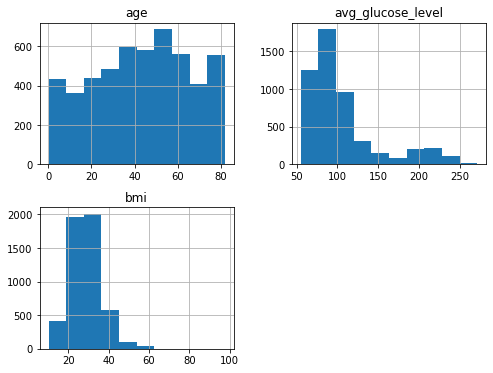

In [11]:
numerical = ['age','avg_glucose_level', 'bmi']
df[numerical].hist(figsize=(8,6));

- As seen in both skewness result and histograms, numerical features have skewness in different degrees.

## Categorical Features

<AxesSubplot:xlabel='gender', ylabel='count'>

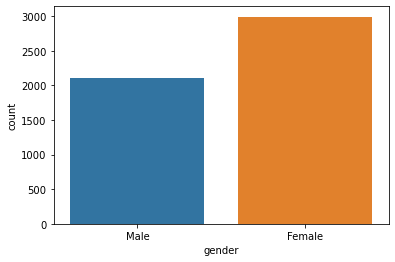

In [12]:
sns.countplot(data=df,x='gender')

We have 2994 female and 2115 male

<AxesSubplot:xlabel='hypertension', ylabel='count'>

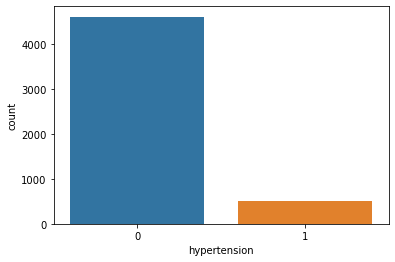

In [13]:
sns.countplot(data=df,x='hypertension')

- We have 498 patient with hypertension which represents at raound 10 % of the sample.

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

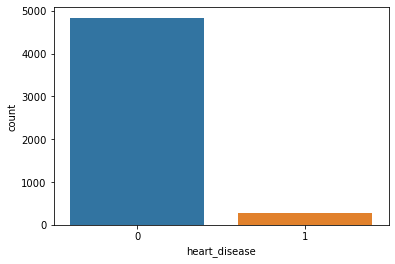

In [14]:
sns.countplot(data=df,x='heart_disease')

- We have 276 patient with heart disease which is 5.4 % of the sample.

<AxesSubplot:xlabel='ever_married', ylabel='count'>

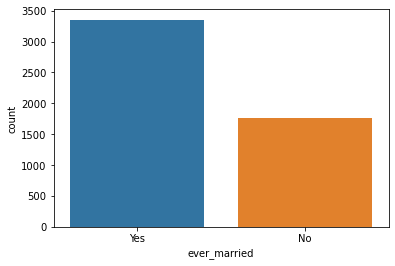

In [15]:
sns.countplot(data=df,x='ever_married')

- 3353 people have been married and 1757 people are not married before.

<AxesSubplot:xlabel='work_type', ylabel='count'>

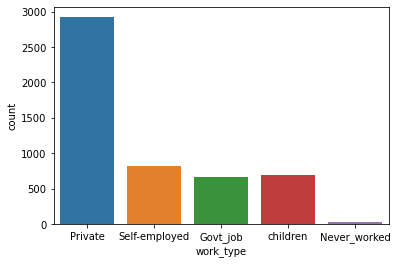

In [16]:
sns.countplot(data=df,x='work_type')

- 2925 people work in the private sector.
- 819 people are self-employed
- 657 people work at the government job.

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

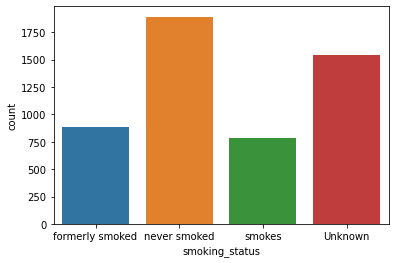

In [17]:
sns.countplot(data=df,x='smoking_status')

- 1892 people are never smoked , 789 people smoke

## Bivariate Analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

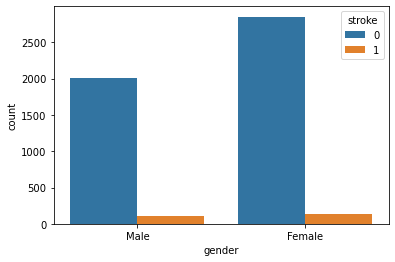

In [18]:
# Gender & Stroke
sns.countplot(data=df,x='gender',hue='stroke')

there is not much difference between stroke rate concerning gender

<AxesSubplot:xlabel='hypertension', ylabel='count'>

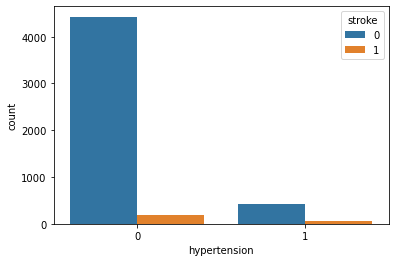

In [19]:
# Hypertension & Stroke
sns.countplot(data=df,x='hypertension',hue='stroke')

Well, young people rarely have hypertension, while the elderly frequently do. A stroke can be brought on by hypertension. Our data do not paint a very clear picture of hypertension. On patients with hypertension, there is not a lot of information.

<AxesSubplot:xlabel='ever_married', ylabel='count'>

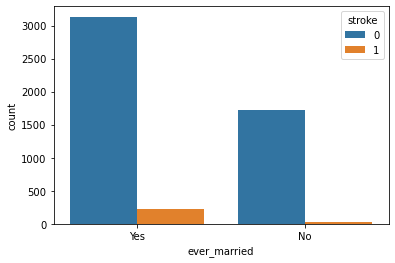

In [20]:
# Married & Stroke
sns.countplot(data=df,x='ever_married',hue='stroke')

People who are married have a higher stroke rate.

<AxesSubplot:xlabel='work_type', ylabel='count'>

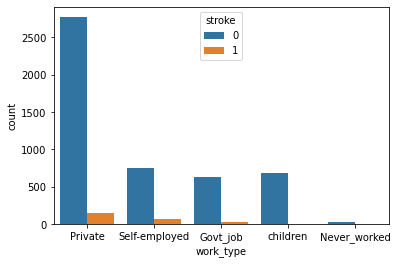

In [21]:
# Work Type & Stroke
sns.countplot(data=df,x='work_type',hue='stroke')

People working in the Private sector have a higher risk of getting a stroke. And people who have never worked have a very less stroke rate.

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

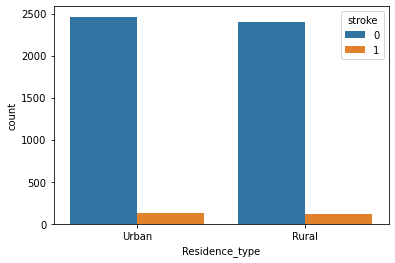

In [22]:
# Work Type & Stroke
sns.countplot(data=df,x='Residence_type',hue='stroke')

there not much difference in both attribute values. Maybe we have to discard it.

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

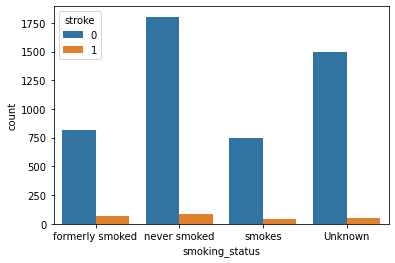

In [23]:
# Smoking & Stroke
sns.countplot(data=df,x='smoking_status',hue='stroke')

- It is smal difference between who smokes and who does not smoke in regard to probability of getting stroke.

<AxesSubplot:xlabel='stroke', ylabel='age'>

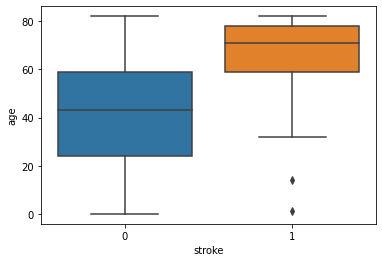

In [24]:
sns.boxplot(data=df,x='stroke',y='age')

Strokes are more likely to occur in people over 60.

Strokes are more likely to occur in people over 60. Some anomalies can be identified as strokes occurring in people under the age of 20. Given that our food and living habits have an impact on stroke, it's probable that the data is accurate. Another finding is that those over 60 years old make up the group of people who do not experience strokes.

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

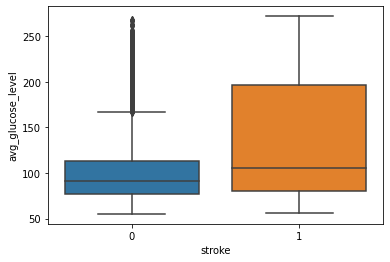

In [25]:
sns.boxplot(data=df,x='stroke',y='avg_glucose_level')

people having stroke have an average glucose level of more than 100.

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

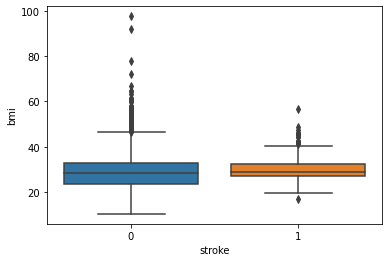

In [26]:
sns.boxplot(data=df,x='stroke',y='bmi')

The relationship between BMI and the risk of stroke has not yet been clearly observed.

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

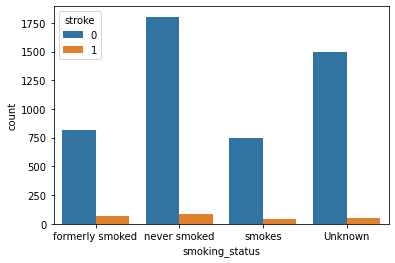

In [27]:
sns.countplot(data=df,x='smoking_status',hue='stroke')

 there is not much difference in the chances of stroke irrespective of smoking status.

Since correlation check only accept numerical variables, preprocessing the categorical variables becomes a necessary step, we need to convert these categorical variables to numbers encoded to 0 or 1. We use labelEncoder from sklearn.preprocessing as it will be easy to decode a particular label back later after predicting if required.

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])


df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.9,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


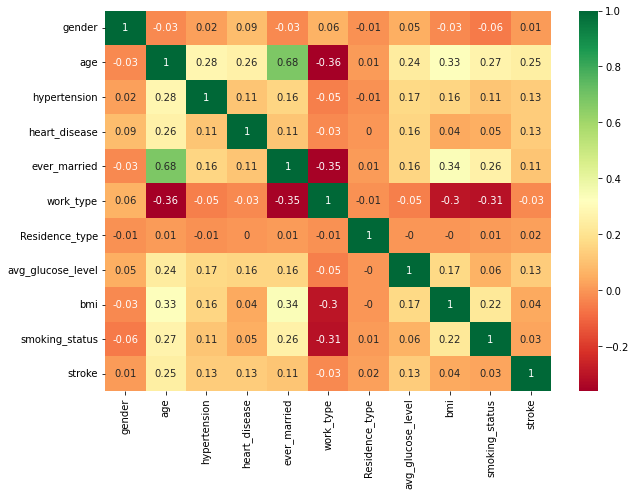

In [29]:
corr = df.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'RdYlGn');

- We can confirm that some of the variables are multicollinear based on the correlation matrix mentioned above. An example of this is the 0.68 correlation between the ever married and age columns. 

<a id='model'></a>
## Data Processing & Modeling

All the predictor variables will be mapped to an array x and the target variable to an array y. 
The target variable is ‘stroke’ column.

In [30]:
# Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff

In [31]:
x=df.drop(['stroke'], axis=1).values  #Features
y=df['stroke'].values #target variable


# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

0    4860
1     249
Name: stroke, dtype: int64


<AxesSubplot:>

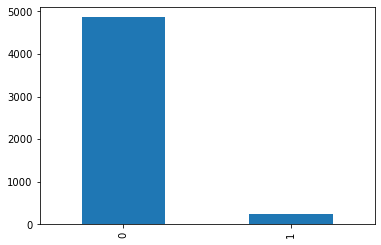

In [32]:
# show the value counts of the calsses in the target
# we can find data impalance
print(df['stroke'].value_counts())
df['stroke'].value_counts().sort_index().plot.bar()

## HANDLING IMBALANCED DATA

- USING SMOTE TECHNIQUE TO HANDLE THE IMBALANCED DATA.

In [33]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 167
Before OverSampling, counts of label '0': 3409 

After OverSampling, the shape of train_X: (6818, 10)
After OverSampling, the shape of train_y: (6818,) 

After OverSampling, counts of label '1': 3409
After OverSampling, counts of label '0': 3409


## Model

In [41]:
def Model(model):
    model.fit(x_train,y_train)
    #Score 
    score = model.score(x_test, y_test)
    model_train_score = model.score(x_train, y_train)
    model_test_score = model.score(x_test, y_test)
    
    # Model Testing
    y_pred = model.predict(x_test)
    
    # Evaluation
    cm = confusion_matrix(y_test,y_pred)
    print(f'Accuracy Score: {accuracy_score(y_test,y_pred).round(3)}')
    
    conf_matrix = pd.DataFrame(cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    
    z=cm
    fig = ff.create_annotated_heatmap(z, x=['Not Stroke','Stroke'], y=['Predicted Not Stroke','Predicted Stroke'],
                                      colorscale='Fall',xgap=3,ygap=3)
    fig['data'][0]['showscale'] = True

    fig.update_layout(title_text='<b>Confusion Matrix<b>',
                      title_x=0.5,
                      titlefont={'size': 15, 'family': 'Courier New'},
                      width=600, height=300,
                      xaxis_showgrid=False,
                      yaxis_showgrid=False,
                      yaxis_autorange='reversed', 
                      paper_bgcolor=None,
                      )

    fig.show()


In [42]:
# Logistic Regression
lg_reg=LogisticRegression()
Model(lg_reg)

Accuracy Score: 0.947


C:\Users\drhem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [36]:
# Decision Tree Classification
d_classif= DecisionTreeClassifier()
Model(d_classif)

Accuracy Score: 0.899


In [37]:
# Support Vector Machine Classification
RF_classif= SVC()
Model(RF_classif)


Accuracy Score: 0.947


In [38]:
# Random Forest Classification
RF_classif= RandomForestClassifier()
Model(RF_classif)

Accuracy Score: 0.945


In [39]:
# K Nearest Neighbour
RF_classif= KNeighborsClassifier()
Model(RF_classif)

Accuracy Score: 0.937


In [40]:
# Naive Bayes
RF_classif= GaussianNB()
Model(RF_classif)

Accuracy Score: 0.863


- From the above accuracy scores, Logistic Regression and Support Vector Machine models all gives high accuracy score of 0.947.

<a id='conclusions'></a>
## conclusions